In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.layers import Flatten,Dense, Input, Conv2D,MaxPool2D, UpSampling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal


In [10]:
(train_x, _), (val_x,_)  =keras.datasets.fashion_mnist.load_data() 

In [12]:
def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = array.reshape((len(array), np.prod( array.shape[1:])))
    return array


In [13]:

def noise(array):
    """Adds random noise to each image in the supplied array."""
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [14]:
def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

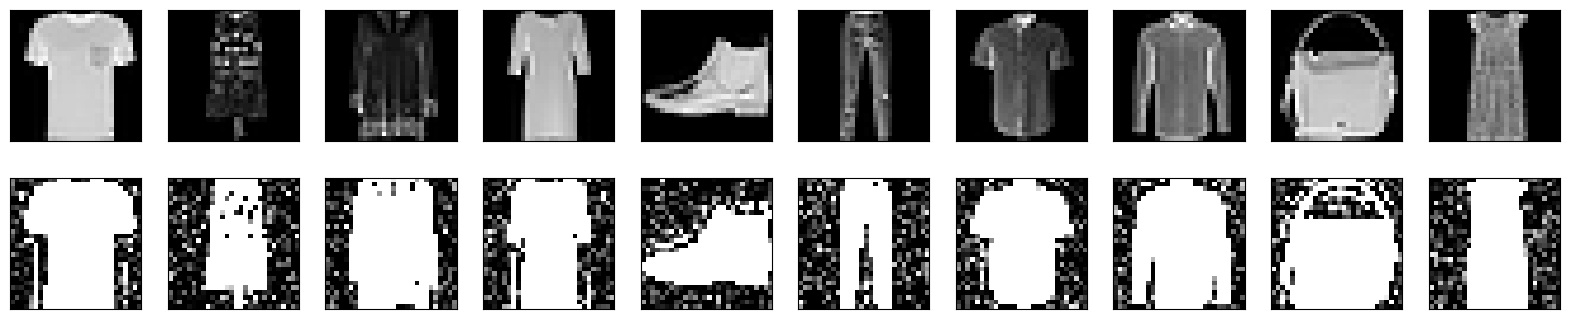

In [16]:


# Create a copy of the data with added noise
noisy_train_data = noise(train_x)
noisy_test_data = noise(val_x)

# Display the train data and a version of it with added noise
display(train_x, noisy_train_data)

In [17]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248  

In [19]:
autoencoder.fit(train_x,noisy_train_data,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, val_x),
)

Epoch 1/50
469/469 [==============================] - 27s 56ms/step - loss: 0.3162 - val_loss: 25.8235
Epoch 2/50
469/469 [==============================] - 27s 57ms/step - loss: 0.2751 - val_loss: -22.9706
Epoch 3/50
469/469 [==============================] - 26s 56ms/step - loss: 0.2657 - val_loss: -72.2125
Epoch 4/50
469/469 [==============================] - 28s 60ms/step - loss: 0.2598 - val_loss: -130.4862
Epoch 5/50
469/469 [==============================] - 28s 61ms/step - loss: 0.2557 - val_loss: -203.8167
Epoch 6/50
469/469 [==============================] - 29s 61ms/step - loss: 0.2527 - val_loss: -279.5549
Epoch 7/50
469/469 [==============================] - 28s 60ms/step - loss: 0.2505 - val_loss: -332.1651
Epoch 8/50
469/469 [==============================] - 28s 60ms/step - loss: 0.2486 - val_loss: -373.0395
Epoch 9/50
469/469 [==============================] - 29s 61ms/step - loss: 0.2472 - val_loss: -410.1929
Epoch 10/50
469/469 [==============================] - 28s 

313/313 [==============================] - 2s 7ms/step


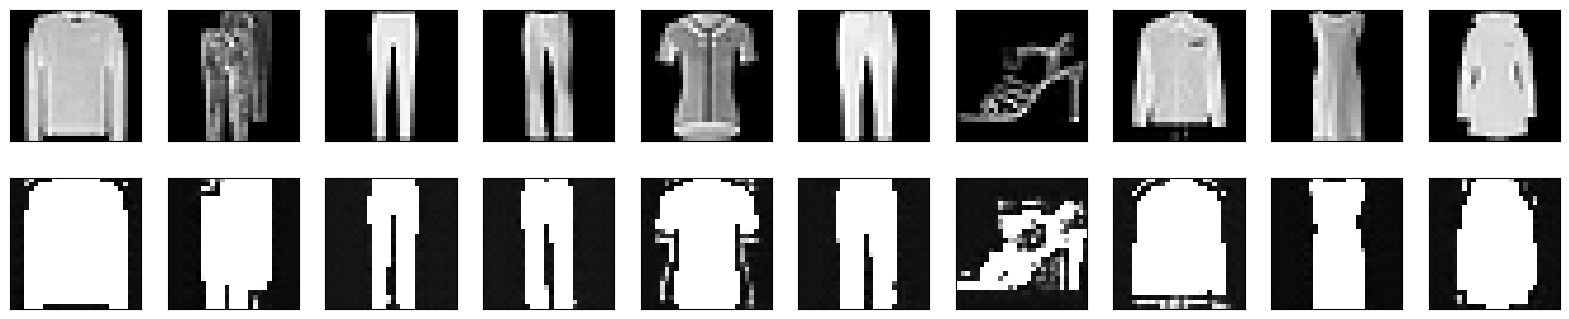

In [20]:
predictions = autoencoder.predict(val_x)
display(val_x, predictions)